<a href="https://colab.research.google.com/github/shoreey/Burn-Out-in-Nurses/blob/main/Burnout_in_Nurses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Descriptive Statistics:
       Participant_ID        Age  Years_of_Experience  \
count        50.00000  50.000000            50.000000   
mean         25.50000  33.780000             7.640000   
std          14.57738   4.621556             3.249867   
min           1.00000  26.000000             2.000000   
25%          13.25000  30.000000             5.000000   
50%          25.50000  33.500000             7.500000   
75%          37.75000  37.000000            10.000000   
max          50.00000  45.000000            15.000000   

       Maslach_Burnout_Score_Pre  Maslach_Burnout_Score_Post  \
count                  50.000000                   50.000000   
mean                   69.840000                   46.120000   
std                     6.453476                    5.324721   
min                    57.000000                   35.000000   
25%                    65.250000                   43.000000   
50%                    70.000000                   46.000000   
75%        

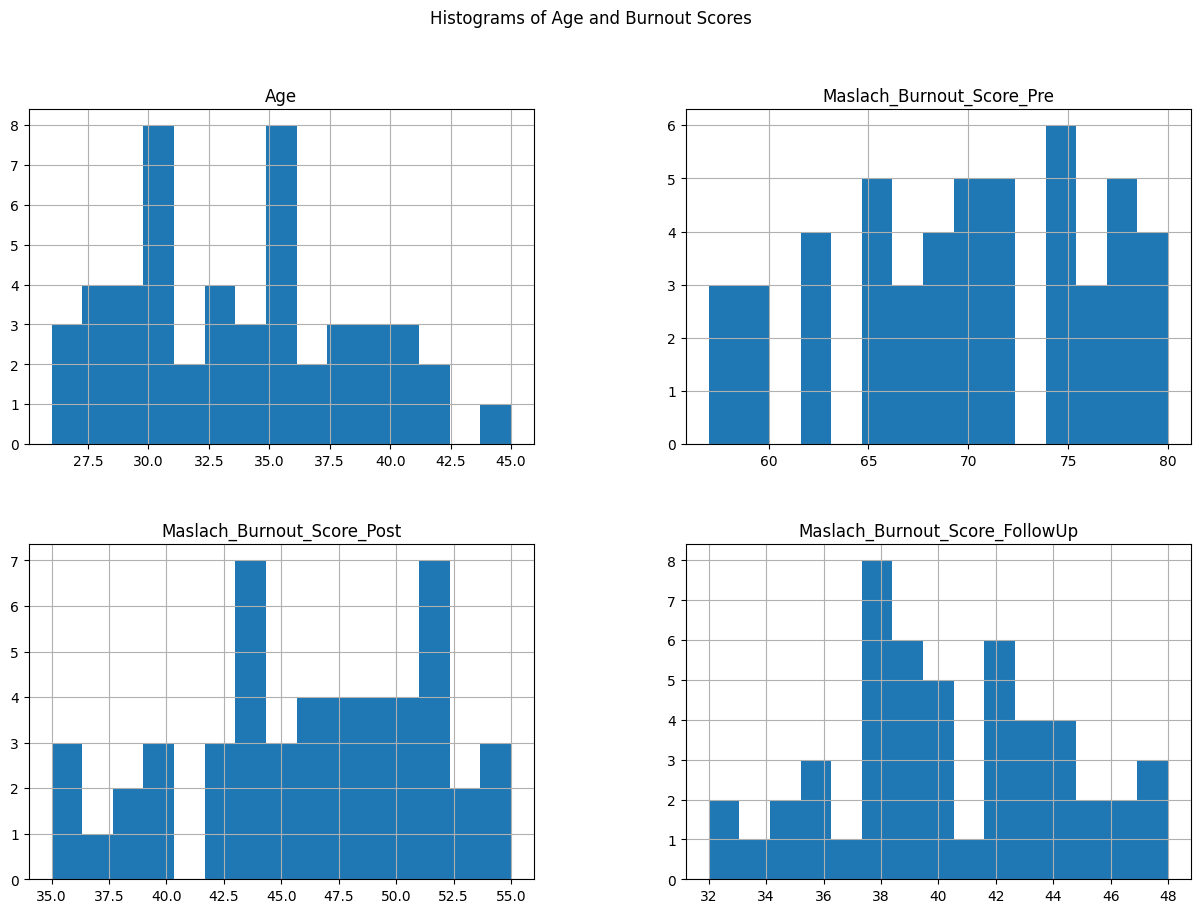

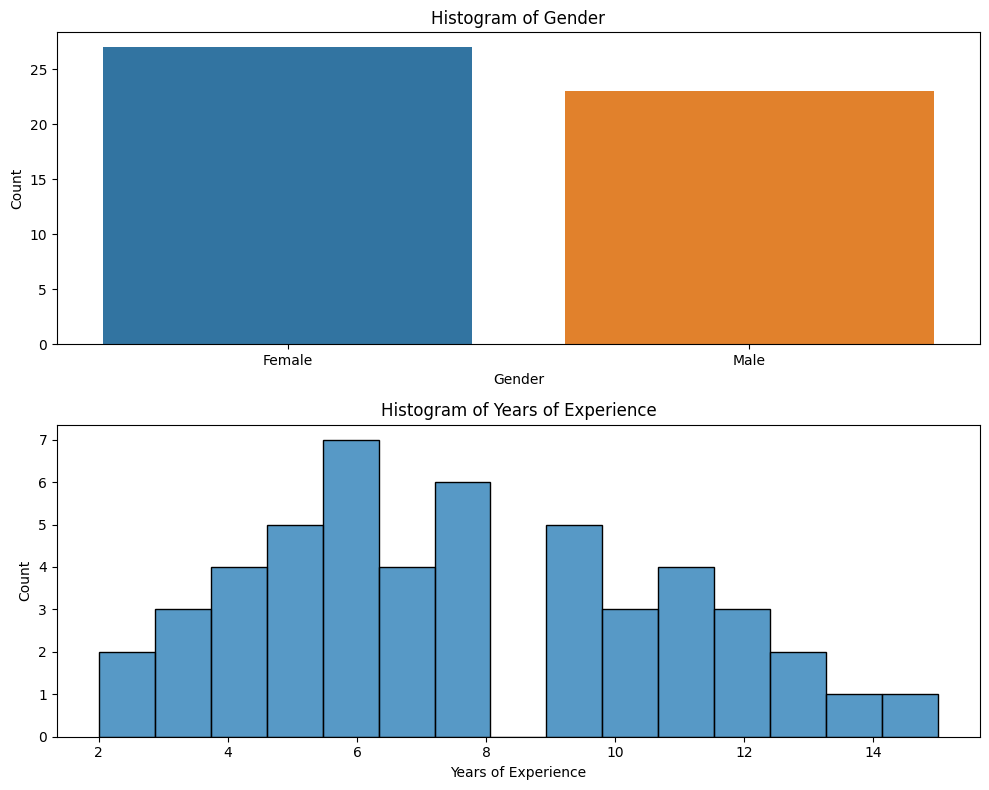


2. Baseline Characteristics:
         Age                                                     \
       count       mean       std   min   25%   50%   75%   max   
Gender                                                            
Female  27.0  31.851852  4.025913  26.0  29.0  31.0  33.5  45.0   
Male    23.0  36.043478  4.300933  27.0  34.5  37.0  39.0  42.0   

       Years_of_Experience                                                  
                     count      mean       std  min  25%   50%   75%   max  
Gender                                                                      
Female                27.0  6.259259  2.739913  2.0  5.0   6.0   7.5  15.0  
Male                  23.0  9.260870  3.092769  3.0  8.0  10.0  11.5  14.0  

3. Effectiveness of Mindfulness Intervention (Paired t-test):
T-statistic: 42.86905736485858, P-value: 1.6401420135805725e-40

4. Linear Mixed-Effects Model (LMM):
                   Mixed Linear Model Regression Results
Model:            MixedLM D

C:\Users\shaur\anaconda3\envs\yolov8\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


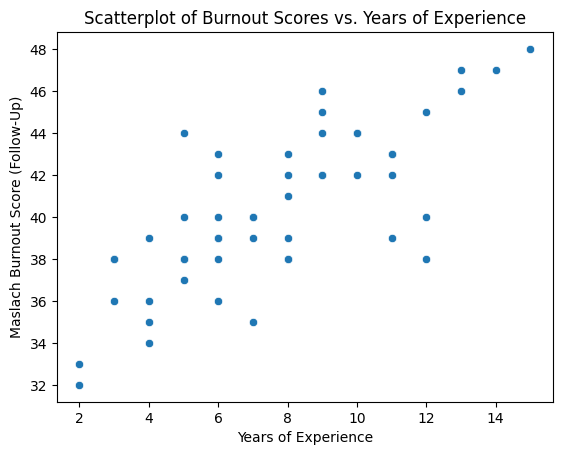

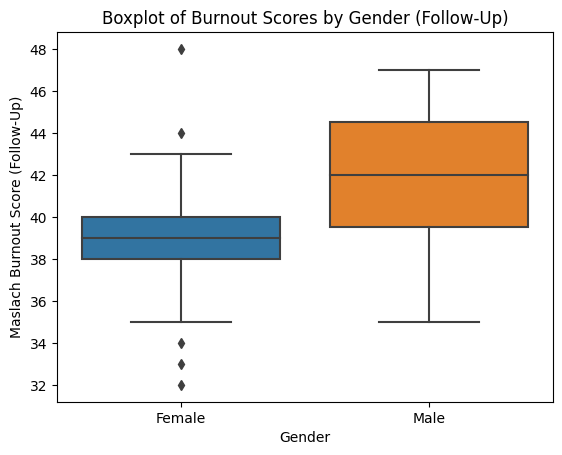

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
file_path = "E:\\Shriya Pal Msc clinical\\Dataset\\Burnout in Nurses.xlsx"
df = pd.read_excel(file_path)

# 1. Descriptive Statistics
descriptive_stats = df.describe()
print("1. Descriptive Statistics:")
print(descriptive_stats)

# Plot histograms for Age and Burnout Scores
df[['Age', 'Maslach_Burnout_Score_Pre', 'Maslach_Burnout_Score_Post', 'Maslach_Burnout_Score_FollowUp']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Age and Burnout Scores')
plt.show()

# Plot histograms for Gender and Years_of_Experience
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.countplot(x='Gender', data=df, ax=axes[0])
axes[0].set_title('Histogram of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.histplot(x='Years_of_Experience', data=df, bins=15, ax=axes[1])
axes[1].set_title('Histogram of Years of Experience')
axes[1].set_xlabel('Years of Experience')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


# 2. Baseline Characteristics
baseline_characteristics = df[['Age', 'Gender', 'Years_of_Experience']].groupby('Gender').describe()
print("\n2. Baseline Characteristics:")
print(baseline_characteristics)

# 3. Effectiveness of Mindfulness Intervention (Paired t-test)
t_stat, p_value_t = ttest_rel(df['Maslach_Burnout_Score_Pre'], df['Maslach_Burnout_Score_Post'])
print("\n3. Effectiveness of Mindfulness Intervention (Paired t-test):")
print(f"T-statistic: {t_stat}, P-value: {p_value_t}")

# 4. Linear Mixed-Effects Model (LMM)
model = smf.mixedlm("Maslach_Burnout_Score_FollowUp ~ Gender", df, groups=df["Participant_ID"])
results_lmm = model.fit()

# Display the results of the LMM
print("\n4. Linear Mixed-Effects Model (LMM):")
print(results_lmm.summary())

# 5. Correlation Analysis
correlation_matrix = df[['Maslach_Burnout_Score_FollowUp', 'Years_of_Experience']].corr()
print("\n5. Correlation Analysis:")
print(correlation_matrix)

# Plot scatterplot for Burnout Scores vs. Years of Experience
sns.scatterplot(x='Years_of_Experience', y='Maslach_Burnout_Score_FollowUp', data=df)
plt.title('Scatterplot of Burnout Scores vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Maslach Burnout Score (Follow-Up)')
plt.show()

# Plot boxplot for Burnout Scores before and after intervention
sns.boxplot(x='Gender', y='Maslach_Burnout_Score_FollowUp', data=df)
plt.title('Boxplot of Burnout Scores by Gender (Follow-Up)')
plt.xlabel('Gender')
plt.ylabel('Maslach Burnout Score (Follow-Up)')
plt.show()


In [ ]:
# Example ANOVA
anova_result = smf.ols('Maslach_Burnout_Score_FollowUp ~ C(Gender)', data=df).fit()
print(anova_result.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Maslach_Burnout_Score_FollowUp   R-squared:                       0.177
Model:                                        OLS   Adj. R-squared:                  0.160
Method:                             Least Squares   F-statistic:                     10.34
Date:                            Tue, 02 Jan 2024   Prob (F-statistic):            0.00233
Time:                                    15:51:26   Log-Likelihood:                -131.95
No. Observations:                              50   AIC:                             267.9
Df Residuals:                                  48   BIC:                             271.7
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----

In [ ]:
# Example Multiple Regression
model_multiple_regression = smf.ols('Maslach_Burnout_Score_FollowUp ~ Age + Gender + Years_of_Experience', data=df).fit()
print(model_multiple_regression.summary())


                                  OLS Regression Results                                  
Dep. Variable:     Maslach_Burnout_Score_FollowUp   R-squared:                       0.583
Model:                                        OLS   Adj. R-squared:                  0.556
Method:                             Least Squares   F-statistic:                     21.46
Date:                            Tue, 02 Jan 2024   Prob (F-statistic):           7.70e-09
Time:                                    15:51:40   Log-Likelihood:                -114.94
No. Observations:                              50   AIC:                             237.9
Df Residuals:                                  46   BIC:                             245.5
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--